# Playground

In [189]:
import os
os.chdir("../")

In [190]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
from src import utils
import matplotlib.pyplot as plt
from scipy.stats import nbinom, binom, poisson
sns.set_theme(context='paper', style='ticks', font_scale=1)

In [191]:
golden = (1 + 5 ** 0.5) / 2
font_scale = 3.5
fig_height = 7

In [193]:
# Set the parameters
num_of_samples = 100000
N = 100
r, k = 2.5, 0.2

In [194]:
# Get samples from a bounded Negative Binomial
# nbinom.stats(n=k, p=1-(r/(r+k)))
negbin_samples = []
for _ in range(num_of_samples):
    sample = nbinom.rvs(n=k, p=1-(r/(r+k)))
    while sample > N:
        sample = nbinom.rvs(n=k, p=1-(r/(r+k)))
    negbin_samples.append(sample)

negbin_df = pd.DataFrame({'Infections' : negbin_samples, 'Method' : ['Neg.Bin.']*num_of_samples})

In [184]:
p = np.mean(negbin_samples)/N # Binomial probability based on effective mean of neg.bin.
# p = r/N
print(p)

0.025044


In [185]:
# Get samples from a binomial
binom_samples = binom.rvs(n=N, p=p, size=num_of_samples)
print(np.mean(binom_samples))
binom_df = pd.DataFrame({'Infections' : binom_samples, 'Method' : ['Binomial']*num_of_samples})

2.50202


In [195]:
# Get samples from a bounded Poisson (later)
poiss_samples = []
for _ in range(num_of_samples):
    sample = poisson.rvs(mu=r)
    while sample > N:
        sample = poisson.rvs(mu=r)
    poiss_samples.append(sample)

poiss_df = pd.DataFrame({'Infections' : poiss_samples, 'Method' : ['Poisson']*num_of_samples})

In [140]:
print(np.mean(poiss_samples))

2.500134


In [196]:
total_df = pd.concat([binom_df, poiss_df])

(0.0, 20.0)

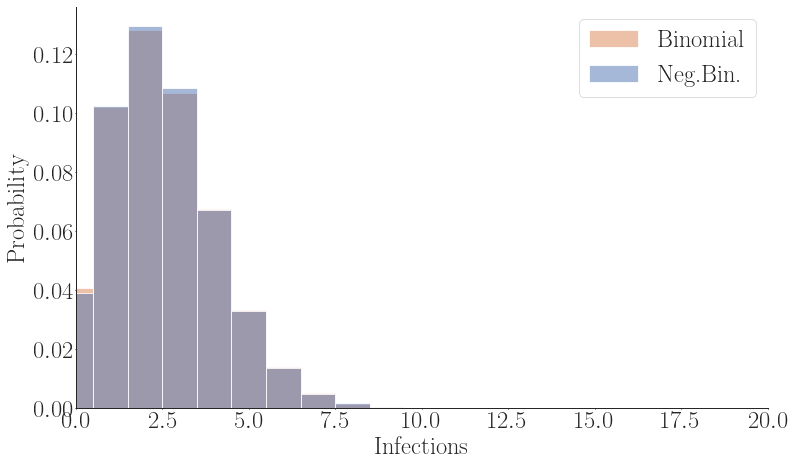

In [188]:
utils.latexify(fig_width=fig_height*golden, fig_height=fig_height, font_scale=font_scale)

g = sns.displot(total_df, x="Infections", hue="Method", hue_order=['Poisson', 'Neg.Bin.'], kind='hist',
                stat='probability', discrete=True, bins=N, aspect=golden, height=fig_height, legend=False, palette='deep')
g.ax.legend(['Poisson', 'Neg.Bin.'])

plt.xlim([0,20])